# Tutorial memplot data angin dan fill color var menggunakan Metpy

created by: Ainur Ridho (ridhoain@gmail.com)

In [6]:
# Impor library yang diperlukan
from datetime import datetime
import metpy.calc as mpcalc
import metpy.plots as mpplots
from metpy.units import units
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import xarray as xr

In [17]:
# Membuka dataset angin
da = xr.open_dataset('hor_wind.nc')

# Mengambil koordinat dan nilai variabel angin
da.coords
latse = da.latitude.data
lonse = da.longitude.data
uwnd = da['u'].isel(time=25)
uwnd = uwnd.values
vwnd = da['v'].isel(time=25)
vwnd = vwnd.values

In [18]:
# Membuka dataset precipitable water
db = xr.open_dataset('totrainwater.nc')

# Mengambil koordinat dan variabel precipitable water
db.coords
lats = db.latitude.data
lons = db.longitude.data
tcrw = db['tcrw'].isel(time=25)
tcrw = tcrw.values
vtime = db.time.data[25].astype('datetime64[ms]').astype('O')

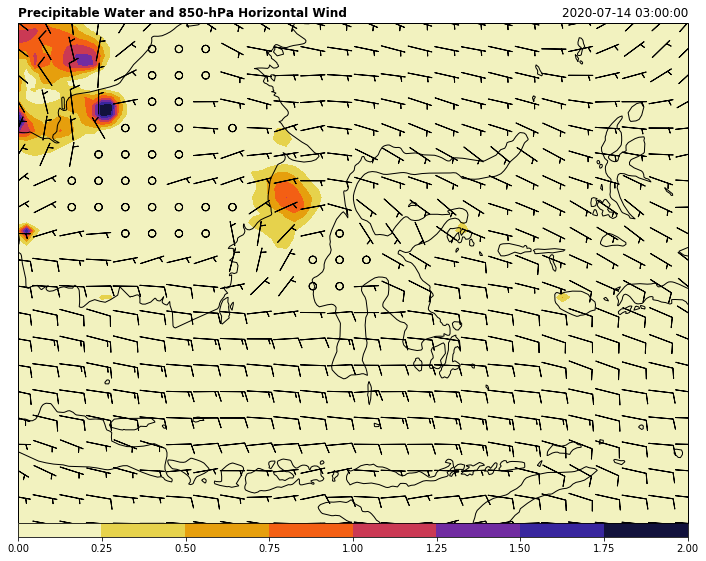

In [24]:
# Mengeset proyeksi peta untuk plotting
mapcrs = ccrs.Mercator(central_longitude=120,
                               min_latitude=-10,
                               max_latitude=5)

# Mengeset proyeksi data yang di plotting
datacrs = ccrs.PlateCarree()

# Membuat figure dan mengeset axis
fig = plt.figure(1, figsize=(12, 12))
ax = plt.subplot(111, projection=mapcrs)
ax.set_extent([110, 130, 5, -10], ccrs.PlateCarree())

# Menambahkan fitur garis pantai di peta
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))

# Mengeplot nilai precipitable water di peta
cf = ax.contourf(lons, lats, tcrw, cmap=plt.cm.CMRmap_r,
                 transform=datacrs)
plt.colorbar(cf, orientation='horizontal', pad=0, aspect=50)

# Mengeplot wind barb
ax.barbs(lonse, latse, uwnd, vwnd, pivot='middle',
         color='black', regrid_shape=20, transform=datacrs)

# Beri judul
plt.title('{}'.format(vtime), loc='right')
plt.title('Precipitable Water and 850-hPa Horizontal Wind', weight='semibold', loc='left')


plt.show()